# Breakfast Hour: Pandas Review
_Authors: Noah Christiansen & Kelly Slatery_

#### 1. Explain the difference between a Series and a DataFrame.

#### 2.a. Read in the `penguins` dataset. Find out how many rows and columns there are, and look at the first 5 rows.
_(**Hint**: what do you need to import?)_

- PalmerPenguins dataset by Allison Horst: https://github.com/allisonhorst/palmerpenguins
    - [Link to CSV](https://github.com/allisonhorst/palmerpenguins/blob/1a19e36ba583887a4630b1f821e3a53d5a4ffb76/data-raw/penguins_raw.csv)

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
df = pd.read_csv('penguins.csv')
df.shape

(344, 17)

In [132]:
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


#### 2.b. Rename the columns to be all lowercase, and replace all spaces in column names with underscores (`_`)

In [133]:
### Three Ways to Rename Columns (There may certainly be more)

# df.columns = [col.replace(' ','_').lower() for col in df.columns]

# df.columns = df.columns.str.replace(' ','_').str.lower()

df.rename(columns = lambda x: x.replace(' ','_').lower(), inplace = True)

#### 3.a. Find out how many null values are in each column of the dataset.

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyname            344 non-null    object 
 1   sample_number        344 non-null    int64  
 2   species              344 non-null    object 
 3   region               344 non-null    object 
 4   island               344 non-null    object 
 5   stage                344 non-null    object 
 6   individual_id        344 non-null    object 
 7   clutch_completion    344 non-null    object 
 8   date_egg             344 non-null    object 
 9   culmen_length_(mm)   342 non-null    float64
 10  culmen_depth_(mm)    342 non-null    float64
 11  flipper_length_(mm)  342 non-null    float64
 12  body_mass_(g)        342 non-null    float64
 13  sex                  334 non-null    object 
 14  delta_15_n_(o/oo)    330 non-null    float64
 15  delta_13_c_(o/oo)    331 non-null    flo

In [135]:
df.isna().sum()

studyname                0
sample_number            0
species                  0
region                   0
island                   0
stage                    0
individual_id            0
clutch_completion        0
date_egg                 0
culmen_length_(mm)       2
culmen_depth_(mm)        2
flipper_length_(mm)      2
body_mass_(g)            2
sex                     10
delta_15_n_(o/oo)       14
delta_13_c_(o/oo)       13
comments               290
dtype: int64

#### 3.b.  Make a plot to visualize how many missing values are in each column.

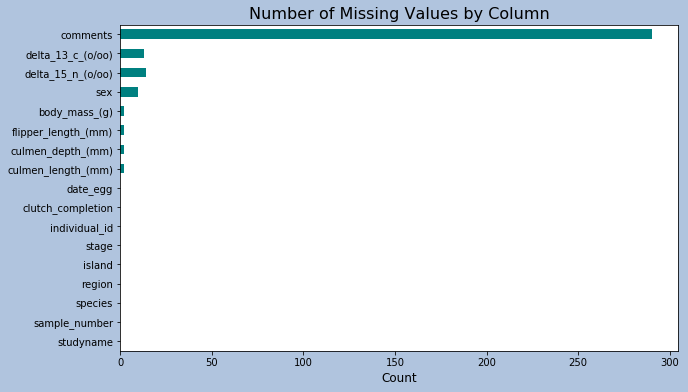

In [136]:
# Method 1: Using Pandas plotting methods with some matplotlib design

plt.figure(figsize = (10,6), facecolor = 'lightsteelblue')
df.isna().sum().plot(kind = 'barh', color = 'teal')

plt.title('Number of Missing Values by Column', size = 16)
plt.xlabel('Count', size = 12);

#### 3.c. Drop the **column** with the most null values, then drop all remaining **rows** containing null values. How many rows are left in the dataset?

In [99]:
df.drop(columns = ['comments'], inplace = True)

In [100]:
df.dropna(inplace = True)

In [101]:
df.shape

(325, 16)

#### 4.a How many species of penguins are in the dataset? How many of each are there?

In [137]:
df['species'].value_counts()

Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: species, dtype: int64

#### 4.b. Plot `body mass` against `flipper length` for one species of penguin.
*(Consider what type of plot would be best suited for this)*

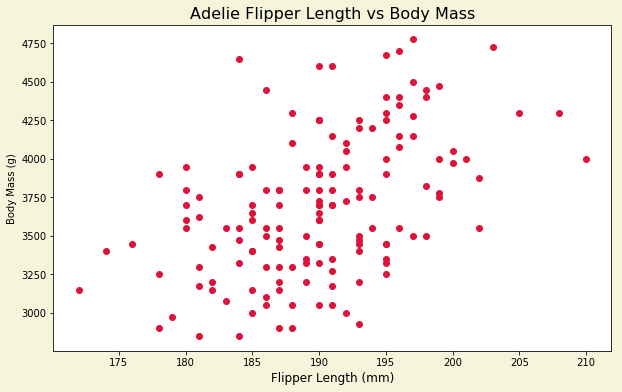

In [150]:
adelie = df[df['species'] == 'Adelie Penguin (Pygoscelis adeliae)']

plt.figure(figsize = (10,6), facecolor = 'beige')
plt.scatter(adelie['flipper_length_(mm)'], adelie['body_mass_(g)'], color = 'crimson')
plt.title('Adelie Flipper Length vs Body Mass', size = 16)
plt.ylabel('Body Mass (g)')
plt.xlabel('Flipper Length (mm)', size=12);

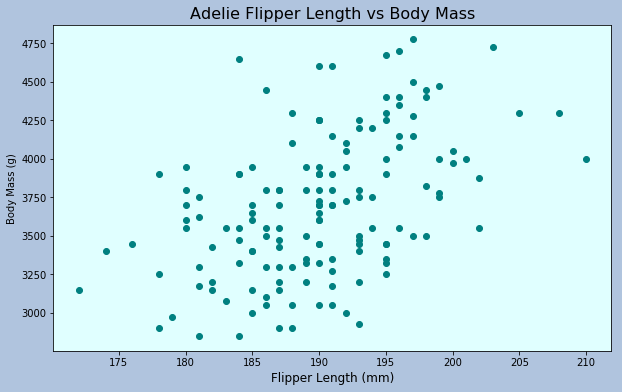

In [151]:
# Method 3: Object Oriented - Unpacking `.subplots()`

## `plt.subplots()` returns a tuple that we can unpack as `fig` and `ax`
## `fig` refers to the figure upon which we are plotting
## `ax` refers to the plots themselves (axes)
fig, ax = plt.subplots(figsize = (10, 6))

## Here we can set the figure facecolor, this is the border of the plot
fig.set_facecolor('lightsteelblue')

ax.scatter(adelie['flipper_length_(mm)'], adelie['body_mass_(g)'], color = 'teal')

## By using the `.set_facecolor()` method we can set the plot background color
ax.set_facecolor('lightcyan')

## Don't forget to label your plots!
ax.set_title('Adelie Flipper Length vs Body Mass', size = 16)
ax.set_ylabel('Body Mass (g)')
ax.set_xlabel('Flipper Length (mm)', size=12);

#### 4.c. Use Seaborn to make a scatter plot of `flipper length` against `body mass` colored by `island` (hint: check out the `hue` parameter)

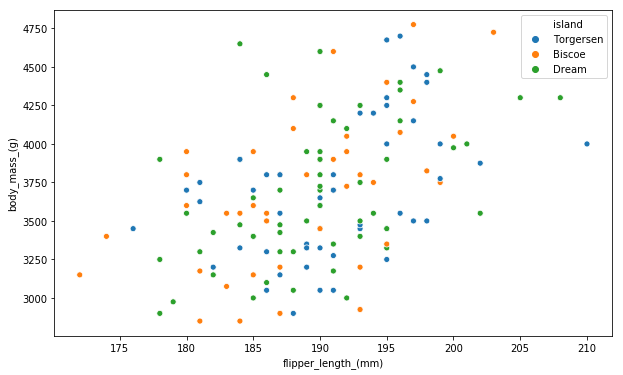

In [153]:
plt.figure(figsize = (10,6))
sns.scatterplot(adelie['flipper_length_(mm)'], adelie['body_mass_(g)'], hue = adelie['island']);

#### 5.a. Use groupby to find the **average and median** values **by species** for the following:
- body mass
- flipper length
- culmen depth
- culmen length

In [104]:
df.groupby(by = 'species')[['body_mass_(g)','flipper_length_(mm)',
                            'culmen_depth_(mm)', 'culmen_length_(mm)']].agg(['mean','median'])

body_mass_(g)          \
                                                   mean  median   
species                                                           
Adelie Penguin (Pygoscelis adeliae)         3702.697842  3700.0   
Chinstrap penguin (Pygoscelis antarctica)   3729.850746  3700.0   
Gentoo penguin (Pygoscelis papua)           5089.285714  5050.0   

                                          flipper_length_(mm)         \
                                                         mean median   
species                                                                
Adelie Penguin (Pygoscelis adeliae)                190.323741  190.0   
Chinstrap penguin (Pygoscelis antarctica)          195.671642  196.0   
Gentoo penguin (Pygoscelis papua)                  217.193277  216.0   

                                          culmen_depth_(mm)         \
                                                       mean median   
species                                                              
Adelie Penguin (Pygoscelis adeliae)               18.323022   18.4   
Chinstrap penguin (Pygoscelis antarctica)         18.404478   18.4   
Gentoo penguin (Pygoscelis papua)                 15.000000   15.0   

                                          culmen_length_(mm)         
                                                        mean median  
species                                                              
Adelie Penguin (Pygoscelis adeliae)                38.785612   38.8  
Chinstrap penguin (Pygoscelis antarctica)          48.788060   49.5  
Gentoo penguin (Pygoscelis papua)                  47.544538   47.4

#### 5.b. Use groupby to find the **average** values **by species and island** for the following:
- body mass
- flipper length
- culmen depth
- culmen length

In [103]:
df.groupby(by = ['island','species'])[['body_mass_(g)','flipper_length_(mm)',
                            'culmen_depth_(mm)', 'culmen_length_(mm)']].mean()

body_mass_(g)  \
island    species                                                    
Biscoe    Adelie Penguin (Pygoscelis adeliae)          3709.659091   
          Gentoo penguin (Pygoscelis papua)            5089.285714   
Dream     Adelie Penguin (Pygoscelis adeliae)          3684.615385   
          Chinstrap penguin (Pygoscelis antarctica)    3729.850746   
Torgersen Adelie Penguin (Pygoscelis adeliae)          3717.441860   

                                                     flipper_length_(mm)  \
island    species                                                          
Biscoe    Adelie Penguin (Pygoscelis adeliae)                 188.795455   
          Gentoo penguin (Pygoscelis papua)                   217.193277   
Dream     Adelie Penguin (Pygoscelis adeliae)                 190.096154   
          Chinstrap penguin (Pygoscelis antarctica)           195.671642   
Torgersen Adelie Penguin (Pygoscelis adeliae)                 192.162791   

                                                     culmen_depth_(mm)  \
island    species                                                        
Biscoe    Adelie Penguin (Pygoscelis adeliae)                18.370455   
          Gentoo penguin (Pygoscelis papua)                  15.000000   
Dream     Adelie Penguin (Pygoscelis adeliae)                18.205769   
          Chinstrap penguin (Pygoscelis antarctica)          18.404478   
Torgersen Adelie Penguin (Pygoscelis adeliae)                18.416279   

                                                     culmen_length_(mm)  
island    species                                                        
Biscoe    Adelie Penguin (Pygoscelis adeliae)                 38.975000  
          Gentoo penguin (Pygoscelis papua)                   47.544538  
Dream     Adelie Penguin (Pygoscelis adeliae)                 38.401923  
          Chinstrap penguin (Pygoscelis antarctica)           48.788060  
Torgersen Adelie Penguin (Pygoscelis adeliae)                 39.055814

In [106]:
def split_apply_combine(df, grouping_columns, analysis_columns, functions):
    return df.groupby(grouping_columns)[analysis_columns].agg(functions)

In [108]:
split_apply_combine(df = df,
                    grouping_columns = ['species','sex'],
                    analysis_columns = ['body_mass_(g)','flipper_length_(mm)'],
                    functions = ['mean', 'median','count'])

body_mass_(g)                \
                                                          mean  median count   
species                                   sex                                  
Adelie Penguin (Pygoscelis adeliae)       FEMALE   3366.549296  3400.0    71   
                                          MALE     4053.676471  4000.0    68   
Chinstrap penguin (Pygoscelis antarctica) FEMALE   3527.205882  3550.0    34   
                                          MALE     3938.636364  3950.0    33   
Gentoo penguin (Pygoscelis papua)         .        4875.000000  4875.0     1   
                                          FEMALE   4679.741379  4700.0    58   
                                          MALE     5488.750000  5500.0    60   

                                                 flipper_length_(mm)         \
                                                                mean median   
species                                   sex                                 
Adelie Penguin (Pygoscelis adeliae)       FEMALE          187.915493  188.0   
                                          MALE            192.838235  193.0   
Chinstrap penguin (Pygoscelis antarctica) FEMALE          191.735294  192.0   
                                          MALE            199.727273  200.0   
Gentoo penguin (Pygoscelis papua)         .               217.000000  217.0   
                                          FEMALE          212.706897  212.0   
                                          MALE            221.533333  221.0   

                                                        
                                                 count  
species                                   sex           
Adelie Penguin (Pygoscelis adeliae)       FEMALE    71  
                                          MALE      68  
Chinstrap penguin (Pygoscelis antarctica) FEMALE    34  
                                          MALE      33  
Gentoo penguin (Pygoscelis papua)         .          1  
                                          FEMALE    58  
                                          MALE      60